In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# read in pokemon.csv
pokemon = pd.read_csv('pokemon.csv')

# remove all third evolution pokemon, clean data
pokemon.drop(pokemon.loc[pokemon['Order'] == 3].index, inplace=True)
pokemon['Order'] = pokemon['Order'] - 1
del pokemon['Type_2']


# perform one hot encoding for pokemon type
enc = OneHotEncoder(handle_unknown='ignore')
X = list(zip(pokemon.Type_1))
enc.fit(X)
feature_vectors = enc.transform(X).toarray()
pokemon[['type_01', 'type_02', 'type_03', 'type_04', 'type_05',
         'type_06', 'type_07', 'type_08', 'type_09', 'type_10', 
         'type_11', 'type_12', 'type_13', 'type_14', 'type_15']] = feature_vectors
del pokemon['Type_1']

# Use Gaussian for datasets with quantitative variables
clf = GaussianNB()
pokemon = pokemon.dropna()

best_p = 0
best_r = 0
best_f = 0

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(pokemon[['Health', 'Attack', 'Defense', 'Speed', 
                                                                 'type_01', 'type_02', 'type_03', 'type_04', 'type_05',
                                                                 'type_06', 'type_07', 'type_08', 'type_09', 'type_10',
                                                                 'type_11', 'type_12', 'type_13', 'type_14', 'type_15',]]
                                                                 .values, pokemon.Order, test_size=0.25)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[1,0])
    if (p[0] > best_p and r[0] > best_r):
        best_p = p[0]
        best_r = r[0]
        best_f = f[0]
    print(p, r, f, s)


display()
display(f'Best Precision -> {best_p}')
display(f'Best Recall    -> {best_r}')
display(f'Best F1        -> {best_f}')


[0.3        0.57142857] [0.5        0.36363636] [0.375      0.44444444] [12 22]
[0.36666667 0.25      ] [0.78571429 0.05      ] [0.5        0.08333333] [14 20]
[0.39393939 0.        ] [0.92857143 0.        ] [0.55319149 0.        ] [14 20]
[0.28125 0.5    ] [0.9        0.04166667] [0.42857143 0.07692308] [10 24]
[0.         0.74193548] [0.         0.88461538] [0.         0.80701754] [ 8 26]
[0.        0.5483871] [0.   0.85] [0.         0.66666667] [14 20]
[0.4 0.5] [0.85714286 0.1       ] [0.54545455 0.16666667] [14 20]
[0.38461538 0.61904762] [0.38461538 0.61904762] [0.38461538 0.61904762] [13 21]
[0.33333333 0.71428571] [0.81818182 0.2173913 ] [0.47368421 0.33333333] [11 23]
[0.39285714 0.16666667] [0.6875     0.05555556] [0.5        0.08333333] [16 18]
[0.35714286 0.45      ] [0.3125 0.5   ] [0.33333333 0.47368421] [16 18]
[0.34482759 0.2       ] [0.71428571 0.05      ] [0.46511628 0.08      ] [14 20]
[0.38709677 0.33333333] [0.85714286 0.05      ] [0.53333333 0.08695652] [14 20]
[0

'Best Precision -> 0.3939393939393939'

'Best Recall    -> 0.9285714285714286'

'Best F1        -> 0.5531914893617021'

### Data Visualization

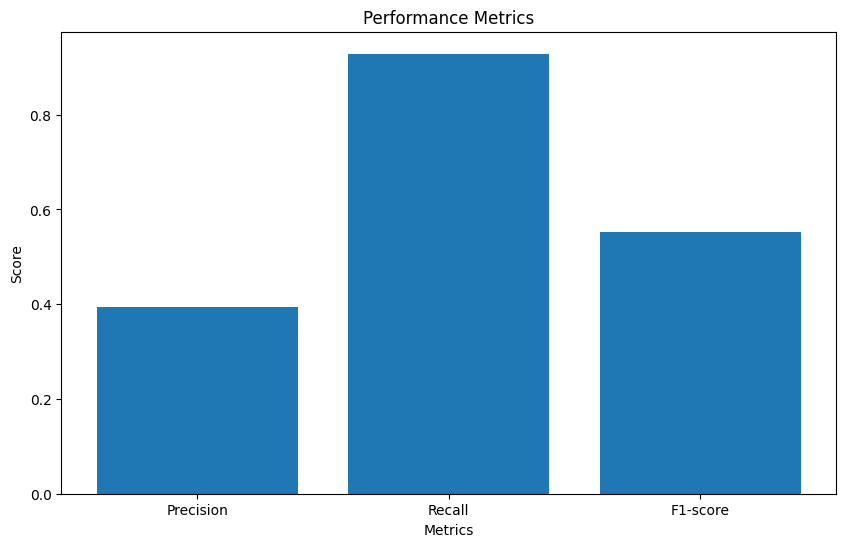

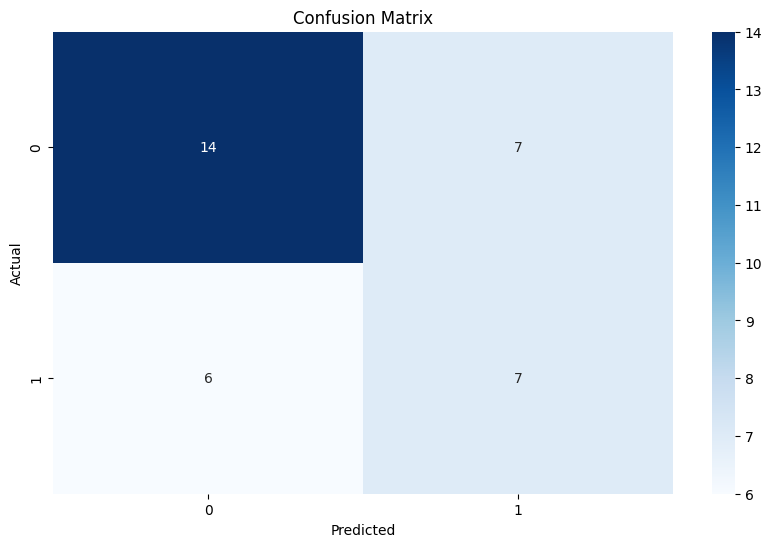

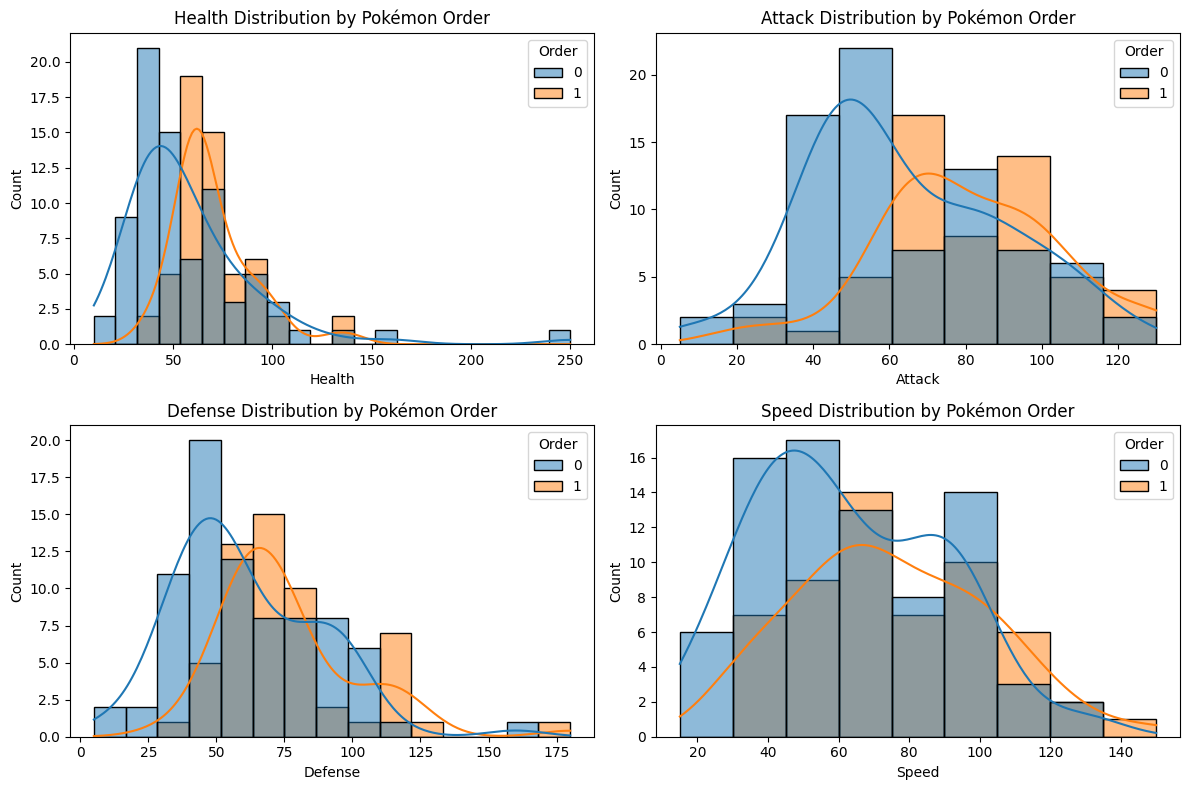

In [2]:
plt.figure(figsize=(10, 6))
plt.bar(['Precision', 'Recall', 'F1-score'], [best_p, best_r, best_f])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


pokemon_attributes = ['Health', 'Attack', 'Defense', 'Speed']
plt.figure(figsize=(12, 8))
for i, attr in enumerate(pokemon_attributes, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data=pokemon, x=attr, hue='Order', kde=True)
    plt.title(f'{attr} Distribution by Pokémon Order')
plt.tight_layout()
plt.show()

